<a href="https://colab.research.google.com/github/ShriDurga17/peacock/blob/main/videotoimage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [57]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten

In [59]:
from keras.preprocessing.image import ImageDataGenerator

In [60]:
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,
                                 horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)

In [63]:
x_train=train_datagen.flow_from_directory("/content/drive/MyDrive/clideo.com/peacock video_split/train", target_size=(64,64),batch_size=64,class_mode="categorical")
x_test=test_datagen.flow_from_directory("/content/drive/MyDrive/clideo.com/peacock video_split/test",
                                          target_size=(64,64),batch_size=64,class_mode="categorical")

Found 3238 images belonging to 2 classes.
Found 366 images belonging to 2 classes.


In [64]:
print(x_train.class_indices)

{'NotPeacock': 0, 'Peacock': 1}


In [65]:
model=Sequential()

In [66]:
model.add(Convolution2D(32,(3,3),input_shape=(64,64,3),activation="relu"))

In [67]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [68]:
model.add(Flatten())

In [97]:
model.add(Dense(units=64,activation="relu"))

In [98]:
model.add(Dense(units=2,activation="softmax"))

In [99]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 30752)             0         
                                                                 
 dense_4 (Dense)             (None, 256)               7872768   
                                                                 
 dense_5 (Dense)             (None, 2)                 514       
                                                                 
 dense_6 (Dense)             (None, 64)                192       
                                                      

In [100]:
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [101]:
model.save("peacock.h5")

In [102]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

In [103]:
model=load_model("peacock.h5")

In [104]:
img=image.load_img("/content/drive/MyDrive/peacocktest/NotPeacock/30.jpg",target_size=(64,64))

In [105]:
x=image.img_to_array(img)

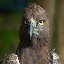

In [106]:
img

In [107]:
x

array([[[ 22.,  38.,  12.],
        [ 20.,  38.,  14.],
        [ 16.,  38.,  17.],
        ...,
        [ 72.,  60.,  34.],
        [ 77.,  65.,  39.],
        [ 82.,  70.,  44.]],

       [[ 21.,  36.,  13.],
        [ 19.,  37.,  15.],
        [ 15.,  36.,  17.],
        ...,
        [ 76.,  64.,  38.],
        [ 81.,  69.,  43.],
        [ 85.,  73.,  47.]],

       [[ 20.,  35.,  14.],
        [ 18.,  35.,  16.],
        [ 14.,  35.,  18.],
        ...,
        [ 78.,  66.,  40.],
        [ 83.,  71.,  45.],
        [ 86.,  74.,  48.]],

       ...,

       [[ 49.,  51.,  30.],
        [  8.,   9.,   0.],
        [ 48.,  48.,  40.],
        ...,
        [124., 110.,  83.],
        [125., 111.,  82.],
        [124., 111.,  79.]],

       [[ 15.,  15.,   3.],
        [ 21.,  21.,  11.],
        [ 44.,  44.,  36.],
        ...,
        [123., 109.,  82.],
        [124., 110.,  81.],
        [123., 110.,  78.]],

       [[ 23.,  22.,  18.],
        [ 53.,  52.,  47.],
        [ 59.,  

In [108]:
x.shape

(64, 64, 3)

In [109]:
x=np.expand_dims(x,axis=0)

In [110]:
x.shape

(1, 64, 64, 3)

In [111]:
y=model.predict(x)
pred=np.argmax(y, axis=1)

1/1 [==============================] - 0s 75ms/step


In [112]:
y

array([[0.52962726, 0.47037283]], dtype=float32)

In [113]:
pred

array([0])

In [96]:
x_train.class_indices

{'NotPeacock': 0, 'Peacock': 1}